In [1]:
# Magic
%matplotlib inline

# Standart libraries
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# My libraries
sys.path.append('../../infra/')
from AssetsData import AssetsData

In [2]:
df = pd.read_csv("../../data/processed_init_data/processed_rolling_data.csv").set_index(['TIMESTAMP', 'ID'])
del df['Unnamed: 0']

In [3]:
# Get the factor data
info = AssetsData()
factors = info.get_factor_names(df)
df_f = df[factors]
corr = df_f.corr()

In [4]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

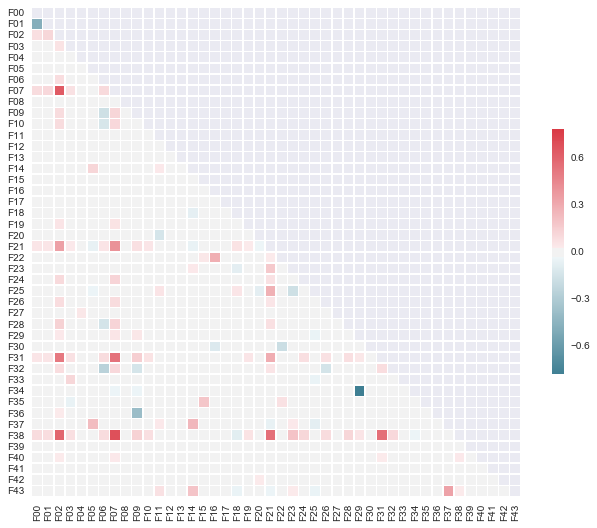

In [5]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})